In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_csv('/content/dados.csv')
del dados ['Unnamed: 0']
dados

,Score,País,Gênero,Idade,Fidelidade,Saldo,Produtos,Cartão,Ativo?,Salário,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#Quem tem mais probabilidade de sair do banco, homens ou mulheres?

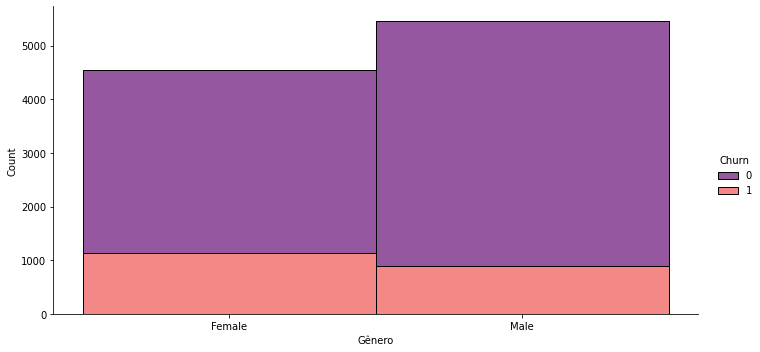

In [6]:
sns.displot(dados, x = dados['Gênero'], kind = 'hist',
            hue = 'Churn', height = 5, aspect = 2,
            palette = 'magma', legend = True, multiple = 'stack')

In [7]:
mulher, homem = dados.groupby(dados['Gênero']).size()
print('Total de homens: ', homem)
print('Total de mulheres: ', mulher)

Total de homens:  5457
Total de mulheres:  4543


In [8]:
ficou, saiu = dados.loc[dados['Gênero']=='Male', 'Churn'].value_counts()
print('Em relação aos homens: \nFicaram: {} \nSairam: {}'.format(ficou, saiu))
print('A proporção de homens que sairam é: {:.2f}'.format(saiu/ficou))

Em relação aos homens: 
Ficaram: 4559 
Sairam: 898
A proporção de homens que sairam é: 0.20


In [9]:
ficou, saiu = dados.loc[dados['Gênero']=='Female', 'Churn'].value_counts()
print('Em relação as mulheres: \nFicaram: {} \nSairam: {}'.format(ficou, saiu))
print('A proporção de mulheres que sairam é: {:.2f}'.format(saiu/ficou))

Em relação as mulheres: 
Ficaram: 3404 
Sairam: 1139
A proporção de mulheres que sairam é: 0.33


As mulheres tem 33% de chances, enquanto os homens tem 20%

#Em qual país temos uma probabilidade maior de os clientes nos deixarem?

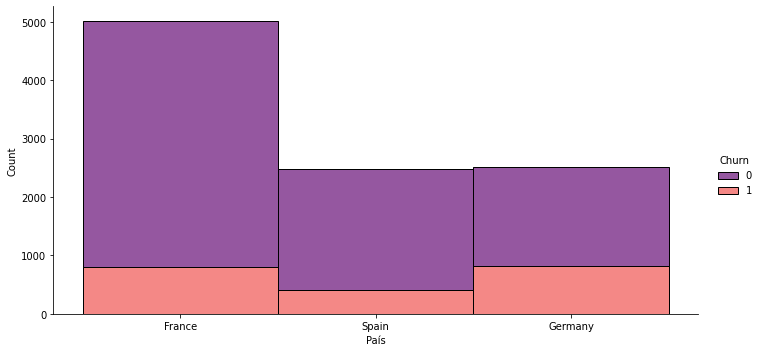

In [10]:
sns.displot(dados, x = dados['País'], kind = 'hist',
            hue = 'Churn', height = 5, aspect = 2,
            palette = 'magma', legend = True, multiple = 'stack')

In [11]:
ficou, saiu = dados.loc[dados['País']=='France', 'Churn'].value_counts()
print('Em relação aos franceses: \nFicaram: {} \nSairam: {}'.format(ficou, saiu))
print('A probabilidade de franceses sairem é: {:.1f}'.format((saiu/ficou)*100),'%')

Em relação aos franceses: 
Ficaram: 4204 
Sairam: 810
A probabilidade de franceses sairem é: 19.3 %


In [12]:
ficou, saiu = dados.loc[dados['País']=='Spain', 'Churn'].value_counts()
print('Em relação aos espanhóis: \nFicaram: {} \nSairam: {}'.format(ficou, saiu))
print('A probabilidade de espanhóis sairem é: {:.1f}'.format((saiu/ficou)*100),'%')

Em relação aos espanhóis: 
Ficaram: 2064 
Sairam: 413
A probabilidade de espanhóis sairem é: 20.0 %


In [13]:
ficou, saiu = dados.loc[dados['País']=='Germany', 'Churn'].value_counts()
print('Em relação aos alemães: \nFicaram: {} \nSairam: {}'.format(ficou, saiu))
print('A probabilidade de alemães sairem é: {:.1f}'.format((saiu/ficou)*100),'%')

Em relação aos alemães: 
Ficaram: 1695 
Sairam: 814
A probabilidade de alemães sairem é: 48.0 %


#Qual a relação entre a longegidade do cliente na empresa e uma possivel saida?

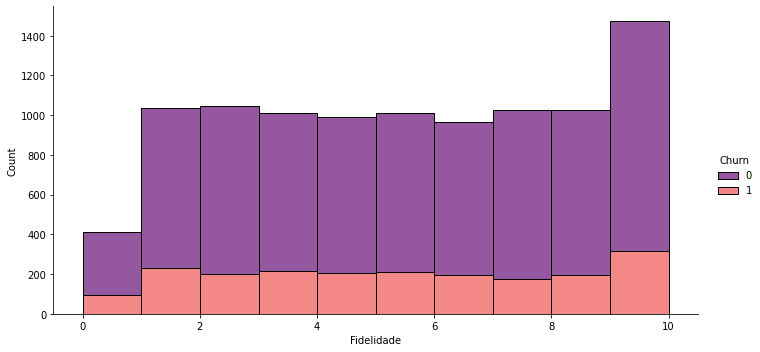

In [14]:
sns.displot(dados, x = dados['Fidelidade'], kind = 'hist',
            hue = 'Churn', height = 5, aspect = 2,
            palette = 'magma', legend = True, multiple = 'stack',
            bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [17]:
def fid_churn(x):
  ficou, saiu = dados.loc[dados['Fidelidade']==x, 'Churn'].value_counts()
  print('Em relação aos que permanceram',x,' anos no banco: \nFicaram: {} \nSairam: {}'.format(ficou, saiu))
  print('A probabilidade de que os clientes que permaneceram por ',x,' anos no banco saiam é: {:.1f}'.format((saiu/ficou)*100),'%','\n')

for x in range(0, 11):
  fid_churn(x)

Em relação aos que permanceram 0  anos no banco: 
Ficaram: 318 
Sairam: 95
A probabilidade de que os clientes que permaneceram por  0  anos no banco saiam é: 29.9 % 

Em relação aos que permanceram 1  anos no banco: 
Ficaram: 803 
Sairam: 232
A probabilidade de que os clientes que permaneceram por  1  anos no banco saiam é: 28.9 % 

Em relação aos que permanceram 2  anos no banco: 
Ficaram: 847 
Sairam: 201
A probabilidade de que os clientes que permaneceram por  2  anos no banco saiam é: 23.7 % 

Em relação aos que permanceram 3  anos no banco: 
Ficaram: 796 
Sairam: 213
A probabilidade de que os clientes que permaneceram por  3  anos no banco saiam é: 26.8 % 

Em relação aos que permanceram 4  anos no banco: 
Ficaram: 786 
Sairam: 203
A probabilidade de que os clientes que permaneceram por  4  anos no banco saiam é: 25.8 % 

Em relação aos que permanceram 5  anos no banco: 
Ficaram: 803 
Sairam: 209
A probabilidade de que os clientes que permaneceram por  5  anos no banco saiam é: 26

Podemos ver que os recém-chegados (menos de 1 ano) tem mais risco de sair 29,9%